# Teste de Regressão para modelo de cálculo de salário

In [37]:
import pandas as pd
import seaborn as sns
import statsmodels.api as sm


In [14]:
df = pd.read_csv('base_funcionarios_v3.csv', sep=',', index_col='Unnamed: 0')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46 entries, 0 to 45
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Salario             46 non-null     float64
 1   Anos_Educ_Superior  46 non-null     int64  
 2   Tempo_Empresa       46 non-null     int64  
 3   Tempo_de_Carreira   46 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 1.8 KB


In [18]:
df.describe()

,Salario,Anos_Educ_Superior,Tempo_Empresa,Tempo_de_Carreira
count,46.000000,46.000000,46.000000,46.000000
mean,6969.797826,5.065217,10.326087,21.194106
std,1924.868873,2.839422,7.601328,15.869038
min,4139.500000,0.000000,0.000000,-3.235467
25%,5818.350000,4.000000,5.250000,9.621697
50%,6394.750000,5.000000,8.500000,17.689876
75%,7972.400000,6.000000,17.250000,29.773380
max,12118.100000,12.000000,27.000000,67.858714


In [25]:
df['Tempo_de_Carreira'] =  df['Tempo_de_Carreira'].apply(lambda x: x *-1 if x < 0 else x)


<Axes: xlabel='Tempo_Empresa', ylabel='Salario'>

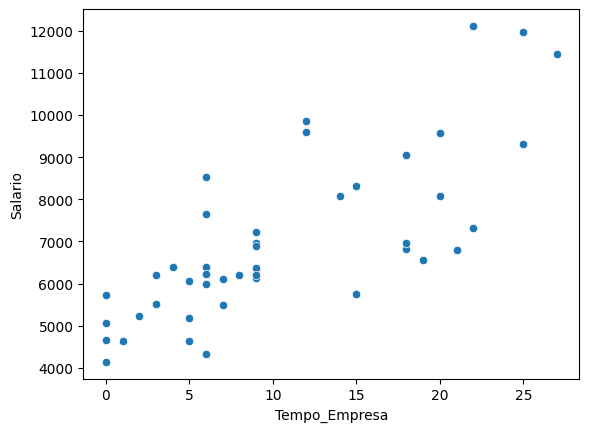

In [32]:
# sns.scatterplot(y=df.Salario, x=df.Tempo_de_Carreira)
sns.scatterplot(y=df.Salario, x=df.Tempo_Empresa)
# sns.scatterplot(y=df.Salario, x=df.Anos_Educ_Superior)


## Problema encontrado: Multi-colinearidade
Aqui vemos no Tempo_de_Carreira x Tempo_Empresa é muito parecido, o que pode gerar uma multi colinearidade. Basicamente é quando duas variáveis são muito parecidas, trazendo problemas para a regressão

In [49]:
df.corr().round(2)

,Salario,Anos_Educ_Superior,Tempo_Empresa,Tempo_de_Carreira,intercept
Salario,1.00,0.78,0.77,0.71,NaN
Anos_Educ_Superior,0.78,1.00,0.61,0.62,NaN
Tempo_Empresa,0.77,0.61,1.00,0.94,NaN
Tempo_de_Carreira,0.71,0.62,0.94,1.00,NaN
intercept,NaN,NaN,NaN,NaN,NaN


In [54]:
#Ajuste do modelo

y = df.Salario

df['intercept'] = 1
x = df[['intercept', 'Tempo_de_Carreira', 'Anos_Educ_Superior']]



In [55]:
model = sm.OLS(y, x)

In [56]:
result= model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                Salario   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                     47.40
Date:                Sat, 05 Apr 2025   Prob (F-statistic):           1.33e-11
Time:                        20:04:39   Log-Likelihood:                -385.86
No. Observations:                  46   AIC:                             777.7
Df Residuals:                      43   BIC:                             783.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
intercept           4117.0610    338

## Teste removendo variável 'Tempo_Empresa'



In [65]:
y = df.Salario

df['intercept'] = 1
x = df[['intercept', 'Tempo_de_Carreira', 'Anos_Educ_Superior']]

In [66]:
model = sm.OLS(y, x)

In [67]:
result = model.fit()

In [68]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                Salario   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                     47.40
Date:                Sat, 05 Apr 2025   Prob (F-statistic):           1.33e-11
Time:                        20:06:22   Log-Likelihood:                -385.86
No. Observations:                  46   AIC:                             777.7
Df Residuals:                      43   BIC:                             783.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
intercept           4117.0610    338